c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 26.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 16.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  

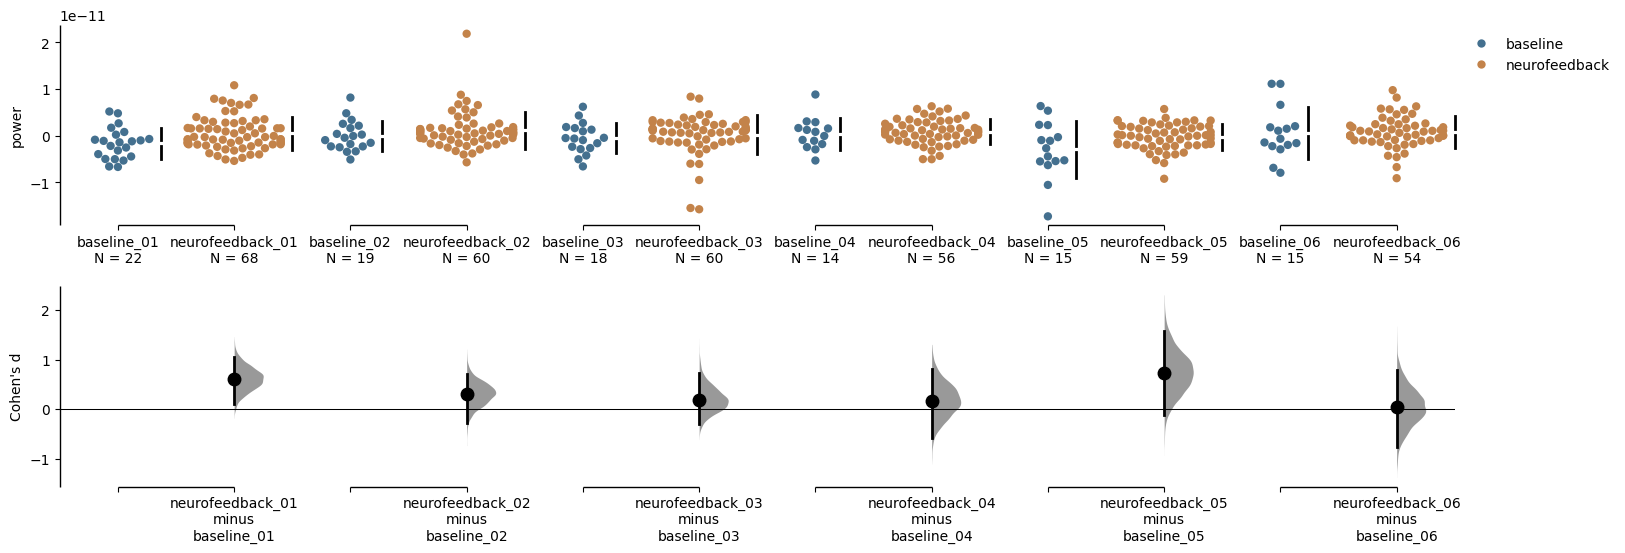

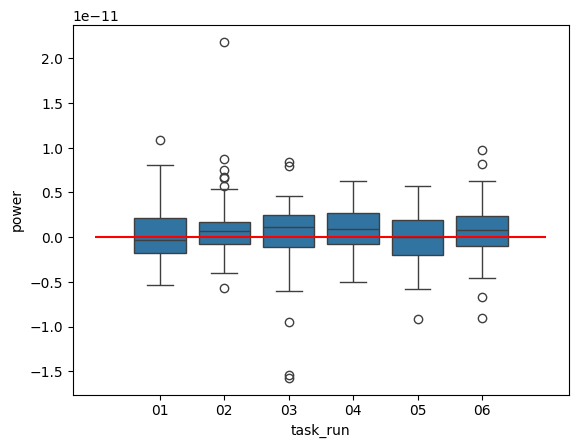

C:\Users\victor.ferat\AppData\Local\Temp\ipykernel_51172\2024394245.py:68: RuntimeWarning: All epochs were dropped!
You might need to alter reject/flat-criteria or drop bad channels to avoid this. You can use Epochs.plot_drop_log() to see which channels are responsible for the dropping of epochs.
  epochs_ = epochs_.drop_bad()
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\dabest\_classes.py:2047: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(err_temp.substitute(lim_type="upper",
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 5.9% of the points cannot

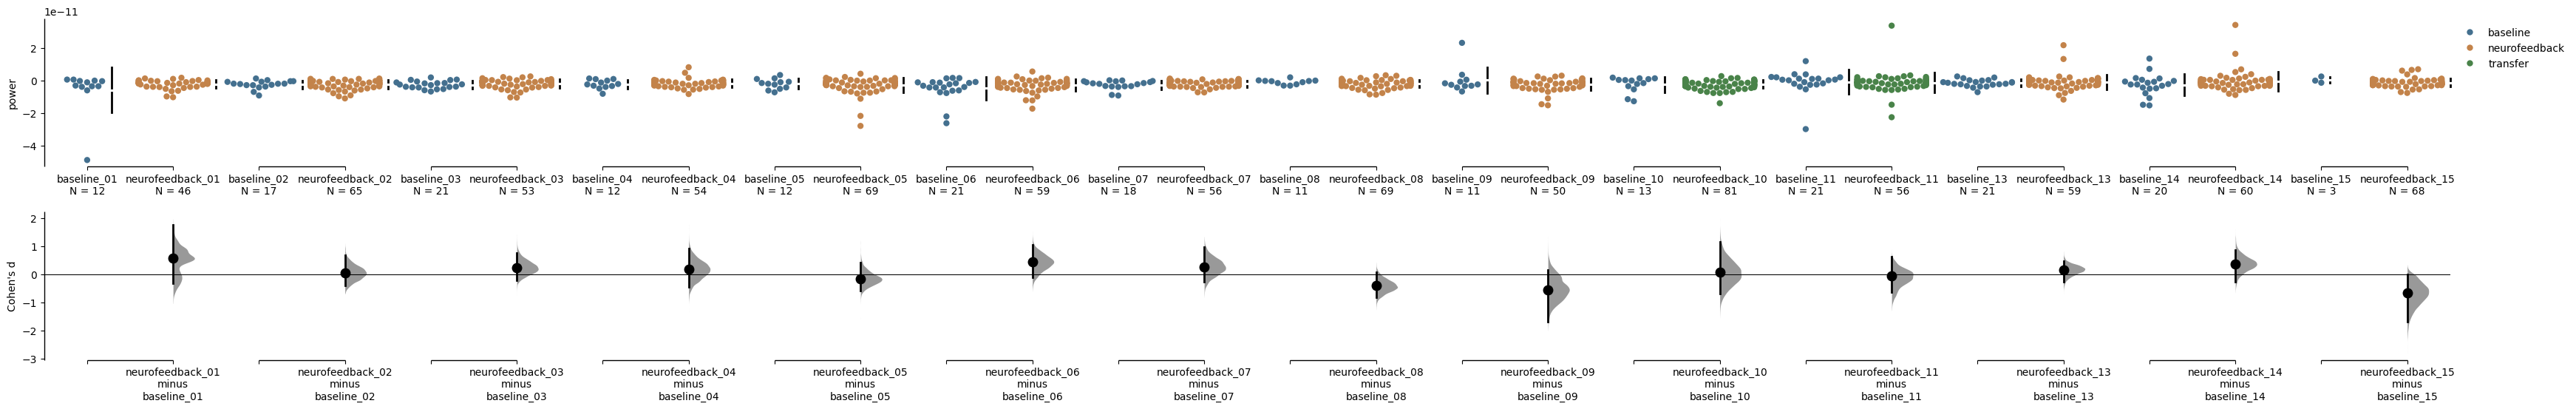

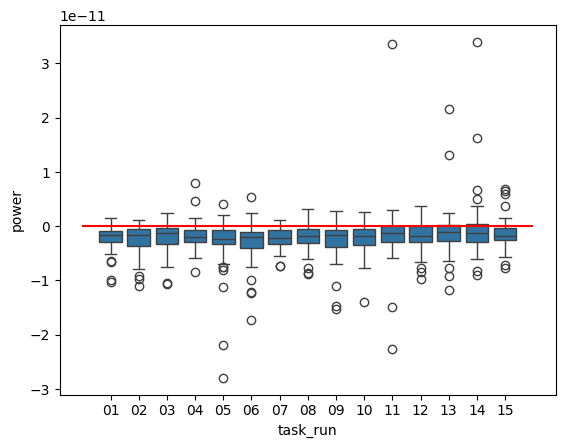

c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 73.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 70.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  

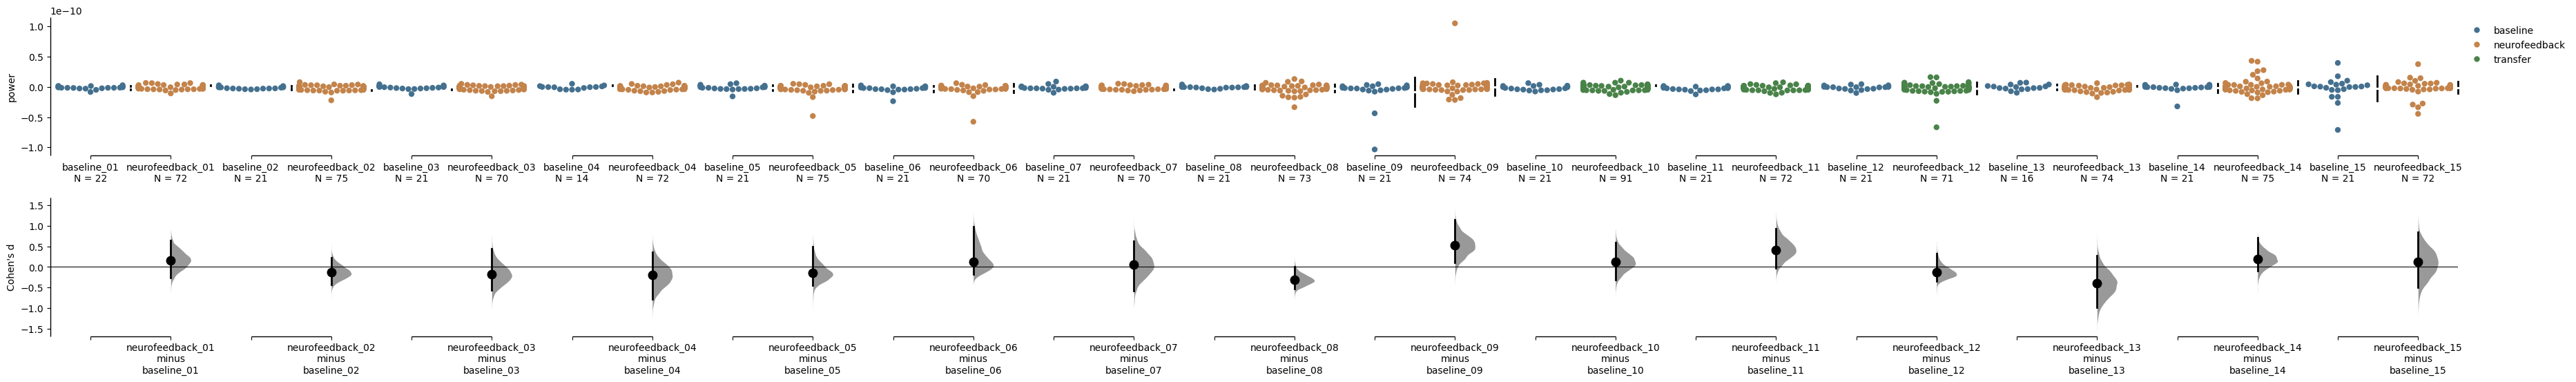

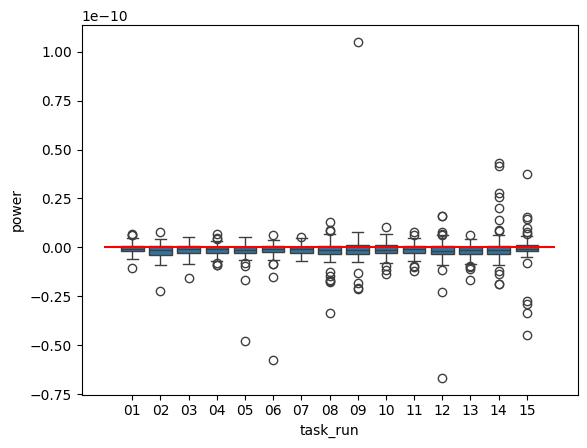

c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 10.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\dabest\plotter.py:563: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  rawdata_axes.set_xticklabels(ticks_with_counts)
c:\Users\victor.ferat\AppData\Local\miniconda3\envs\soraya\lib\site-packages\seaborn\categorical.py:3398: UserWarning: 13.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


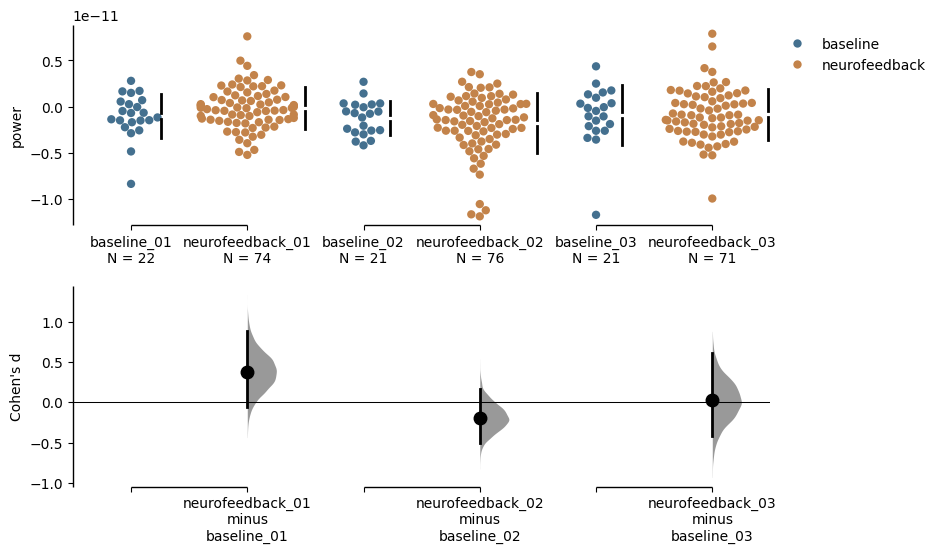

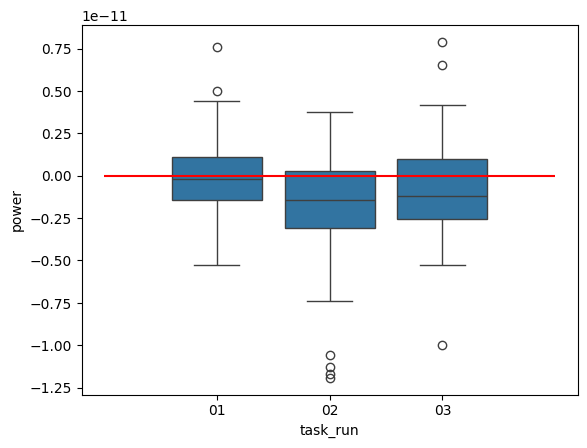

In [7]:
import mne
import numpy as np
import os
import dabest
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def new(row):
    run = row['run']
    task = row['task']
    if task == 'neurofeedback':
        if run == '10':
            run = '13'
        elif run == '11':
            run = '14'       
        elif run == '12':
            run = '15'
    elif task == 'transfer':
        task = 'neurofeedback'
        if run == '01':
            run = '10'
        elif run == '02':
            run = '11'       
        elif run == '03':
            run = '12'
    return(task, run)
    
for subject,session  in [('pilot5', '01'), ('pilot6', '01'), ('pilot7', '01'), ('pilot8', '01')]:
    # Load data
    folder = fr'C:\Users\victor.ferat\Documents\Soraya\NBF\data\sub-{subject}\ses-{session}\eeg'
    tmin = 0
    tmax = 0
    raws = list()
    
    metadatas = list()
    for file in os.listdir(folder):
        if file.endswith('.fif'):
            file_path = os.path.join(folder, file)
            raw = mne.io.read_raw_fif(file_path)
            raw.pick_types(eeg=True, stim=False)
            metadata = dict()
            metadata['subject'] = file.split('_')[0].split('-')[1]
            metadata['session'] = file.split('_')[1].split('-')[1]
            metadata['task'] = file.split('_')[2].split('-')[1]
            metadata['run'] = file.split('_')[3].split('-')[1]
            if metadata['task'] in ['baseline', 'neurofeedback', 'restingstate', 'transfer']:
                tmin = tmax
                tmax = tmax + raw.times[-1]
                metadata['tmin'] = tmin
                metadata['tmax'] = tmax
                metadatas.append(metadata)
                raws.append(raw)
    
    preproc = fr'C:\Users\victor.ferat\Documents\GitHub\neuxus_test\sub-{subject}_ses-{session}_annotated-preproc-raw.fif'
    raw_ica = mne.io.read_raw_fif(preproc)
    
    # Define the electrodes of interest
    electrodes_OI_right = ['P4', 'P8', 'O2']
    electrodes_OI_left = ['P3', 'P7', 'O1']
    freqs = [8, 13]
    # Compute the alpha power on average for the specified electrodes
    duration = 2
    psds = list()
    for metadata in metadatas:
        raw_ = raw_ica.copy().crop(metadata['tmin'], metadata['tmax'])
        epochs_ = mne.make_fixed_length_epochs(raw_, duration=duration, overlap=0.5, preload=False)
        epochs_ = epochs_.drop_bad()
        if len(epochs_):
            tf = mne.time_frequency.psd_array_welch(epochs_.get_data( picks=electrodes_OI_right), raw.info['sfreq'], fmin=freqs[0], fmax=freqs[1],)
            alpha_power_right = np.average(np.average(tf[0], axis=2), axis=1)
        
            tf = mne.time_frequency.psd_array_welch(epochs_.get_data( picks=electrodes_OI_left), raw.info['sfreq'], fmin=freqs[0], fmax=freqs[1],)
            alpha_power_left = np.average(np.average(tf[0], axis=2), axis=1)
        
            metadata['alpha_power_right_dist'] = alpha_power_right
            metadata['alpha_power_left_dist'] = alpha_power_left
            metadata['alpha_power_right'] = np.average(alpha_power_right)
            metadata['alpha_power_left'] = np.average(alpha_power_left)
            
            for right, left  in zip(alpha_power_right, alpha_power_left):
                p = {'power': right - left,
                    'side': 'right - left',
                     'run': metadata['run'],
                     'task': metadata['task']}
                psds.append(p)
    
    df = pd.DataFrame(psds)
    
    
    df[['new_task', 'new_run']] = [new(row) for r, row in df.iterrows()]
    df['task_run'] = df['new_task'] + '_' + df['new_run']
    # Stats
    
    runs_nf = df[df['new_task'] == 'neurofeedback']['new_run'].unique()
    runs_baseline = df[df['new_task'] == 'baseline']['new_run'].unique()
    runs = np.intersect1d(runs_nf, runs_baseline)
    runs.sort()
    idx = [(f"baseline_{i}", f"neurofeedback_{i}") for i in runs]
    
    unpaired = dabest.load(data = df,
                              idx=idx,
                              x="task_run", y="power")
    
    unpaired.cohens_d.plot(color_col='task')
    
    order = df[df['new_task'] == 'neurofeedback']['task_run'].unique()
    order.sort()
    xticks_labels = [o.split('_')[-1] for o in order]
    xticks = np.arange(len(xticks_labels))
    
    fig, ax = plt.subplots()
    sns.boxplot(data=df, x='task_run', y='power',order=order, ax=ax)
    ax.set_xticks(xticks, xticks_labels)
    
    ax.hlines(y=0, xmin=-1, xmax=xticks.max()+1, color='red')
    
    plt.show()